<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

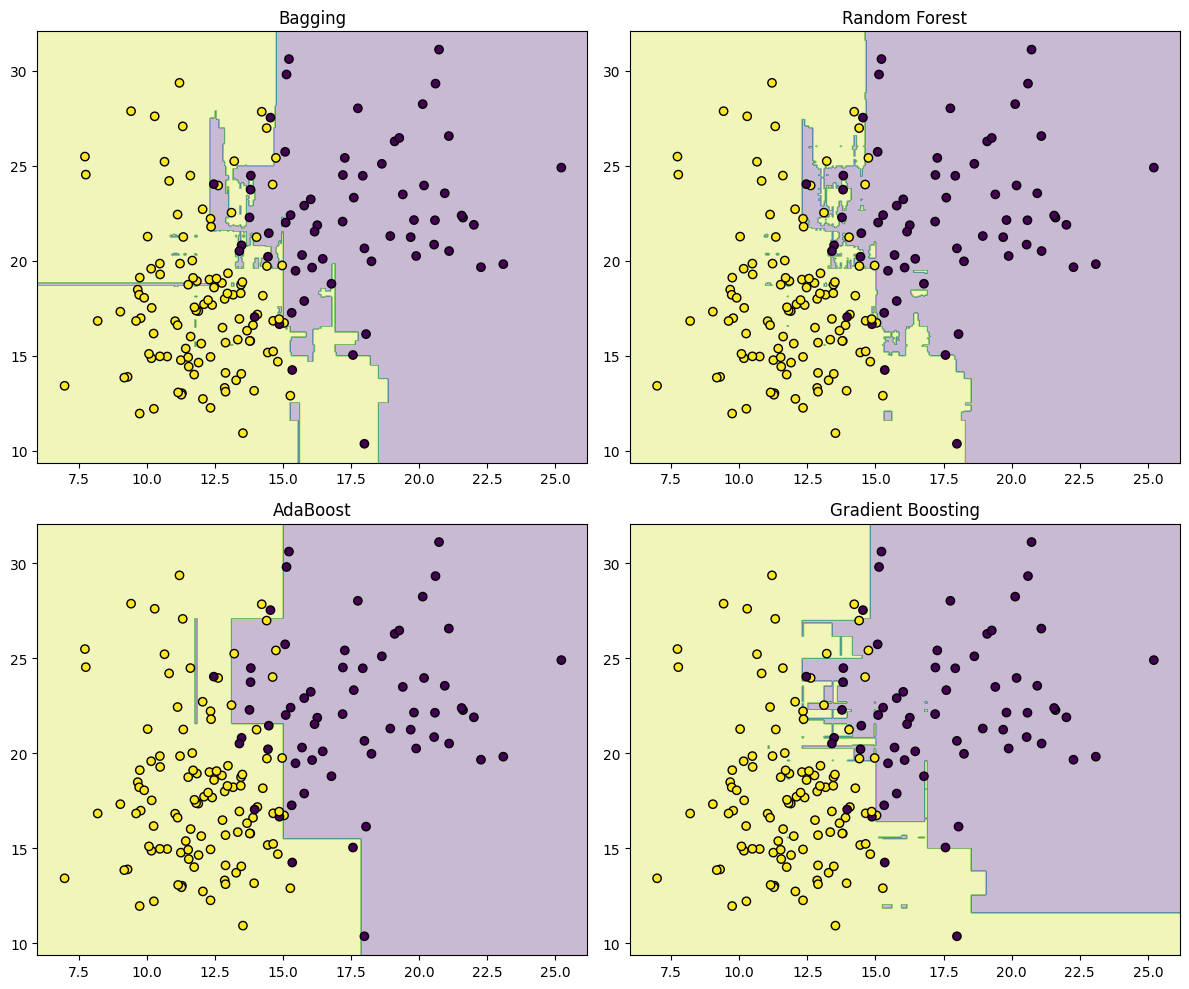


Accuracy with Missing Data:
Bagging: Accuracy = 0.9591
Random Forest: Accuracy = 0.9649
AdaBoost: Accuracy = 0.9649
Gradient Boosting: Accuracy = 0.9591

Random Forest feature importances:
mean radius: 0.0581
mean texture: 0.0129
mean perimeter: 0.0526
mean area: 0.0490
mean smoothness: 0.0072
mean compactness: 0.0102
mean concavity: 0.0694
mean concave points: 0.1253
mean symmetry: 0.0030
mean fractal dimension: 0.0037
radius error: 0.0185
texture error: 0.0039
perimeter error: 0.0115
area error: 0.0375
smoothness error: 0.0035
compactness error: 0.0060
concavity error: 0.0060
concave points error: 0.0039
symmetry error: 0.0028
fractal dimension error: 0.0084
worst radius: 0.0467
worst texture: 0.0244
worst perimeter: 0.0812
worst area: 0.1161
worst smoothness: 0.0079
worst compactness: 0.0170
worst concavity: 0.0528
worst concave points: 0.1370
worst symmetry: 0.0153
worst fractal dimension: 0.0081

Gradient Boosting feature importances:
mean radius: 0.0002
mean texture: 0.0102
mean

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
data = load_breast_cancer()
X_full = data.data
y = data.target
X = X_full[:, :2]  # only first 2 features for visualization

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define ensemble models
models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax.set_title(title)

# Plot boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axes.ravel(), models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, ax, name)
plt.tight_layout()
plt.show()

# Handle missing data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.3, random_state=42)
rng = np.random.default_rng(42)
X_train_missing = X_train_full.copy()
mask = rng.random(X_train_missing.shape) < 0.1
X_train_missing[mask] = np.nan

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_missing)
X_test_imputed = imputer.transform(X_test_full)

print("\nAccuracy with Missing Data:")
for name, model in models.items():
    model.fit(X_train_imputed, y_train_full)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test_full, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

# Feature importances
for name in ["Random Forest", "Gradient Boosting"]:
    model = models[name]
    importances = model.feature_importances_
    print(f"\n{name} feature importances:")
    for i, val in enumerate(importances):
        print(f"{data.feature_names[i]}: {val:.4f}")


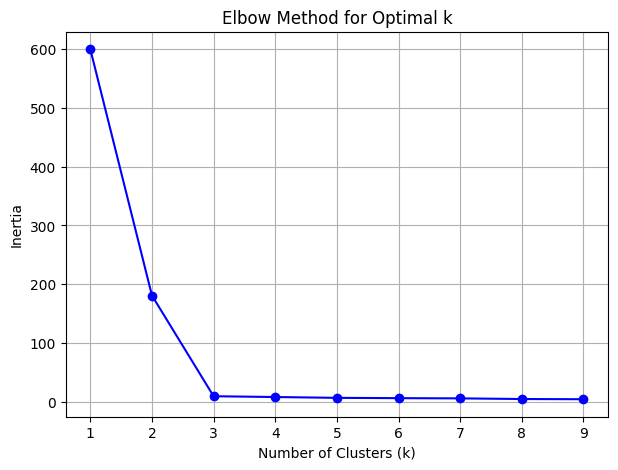

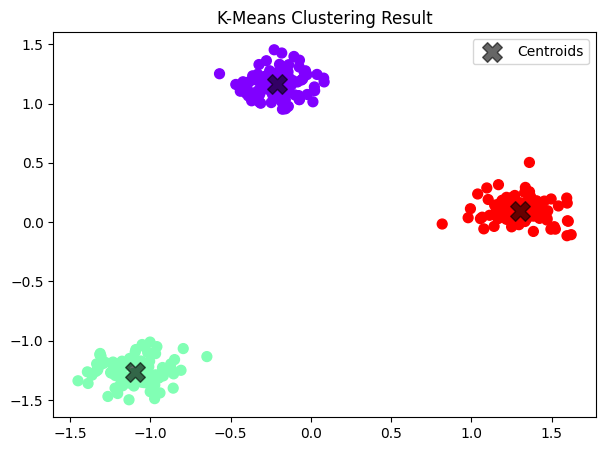

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (3 clusters)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

# Scale data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia, 'bo-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Train KMeans with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot final clusters
plt.figure(figsize=(7, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, alpha=0.6, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()


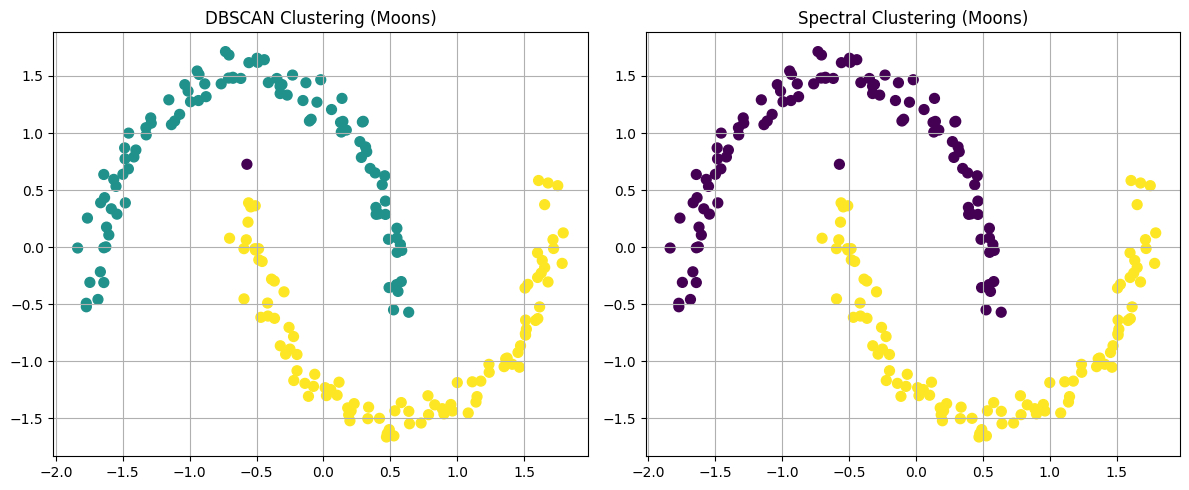

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


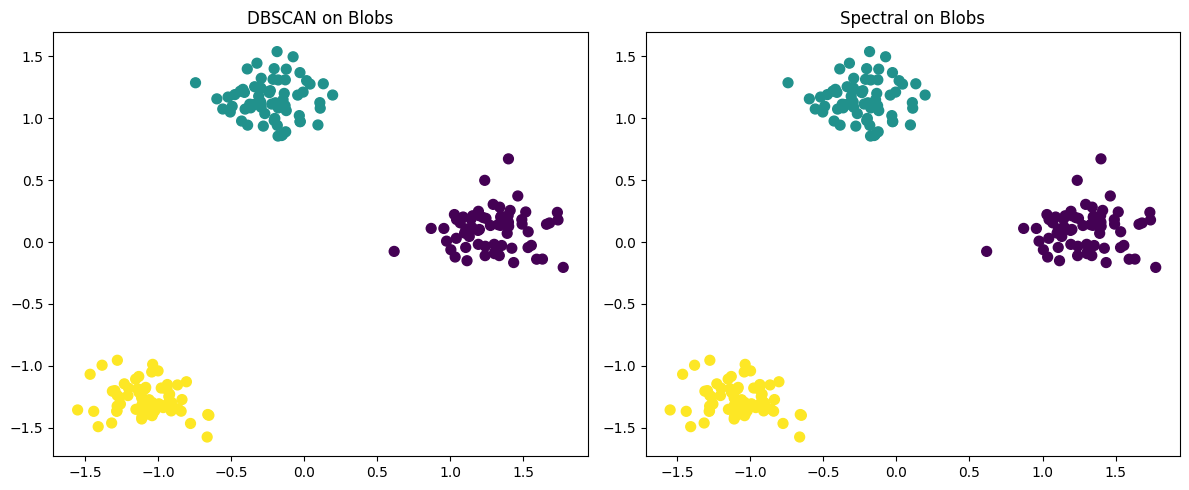

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

# ====== Option 1: Make Moons Dataset ======
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
# Optionally scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN (density-based)
db_labels = DBSCAN(eps=0.3, min_samples=5).fit_predict(X_scaled)

# Spectral Clustering (graph-based)
sp_labels = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42).fit_predict(X_scaled)

# Plot results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=db_labels, cmap='viridis', s=50)
ax1.set_title("DBSCAN Clustering (Moons)")
ax1.grid(True)

ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=sp_labels, cmap='viridis', s=50)
ax2.set_title("Spectral Clustering (Moons)")
ax2.grid(True)

plt.tight_layout()
plt.show()

# ====== Option 2: Blobs Dataset ======
X_blob, _ = make_blobs(n_samples=200, centers=3, random_state=42)
X_blob_scaled = scaler.fit_transform(X_blob)

# DBSCAN on blobs
db_labels_blob = DBSCAN(eps=0.8, min_samples=10).fit_predict(X_blob_scaled)

# Spectral on blobs
sp_labels_blob = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42).fit_predict(X_blob_scaled)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_blob_scaled[:, 0], X_blob_scaled[:, 1], c=db_labels_blob, cmap='viridis', s=50)
ax1.set_title("DBSCAN on Blobs")
ax2.scatter(X_blob_scaled[:, 0], X_blob_scaled[:, 1], c=sp_labels_blob, cmap='viridis', s=50)
ax2.set_title("Spectral on Blobs")
plt.tight_layout()
plt.show()


SFS(Sequential Forward Selection)

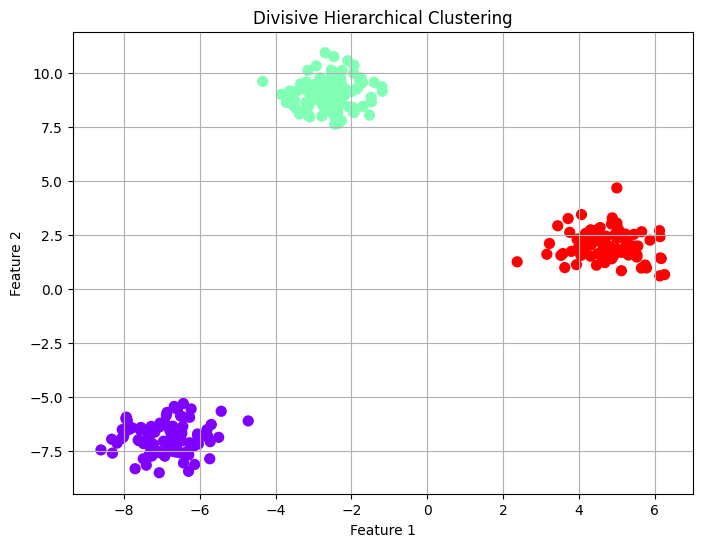

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

def divisive_clustering(X, n_clusters=3):
    clusters = [X]  # Start with all points in one cluster
    labels = np.zeros(len(X), dtype=int)

    while len(clusters) < n_clusters:
        # Find the largest cluster to split
        largest_idx = np.argmax([len(c) for c in clusters])
        cluster_to_split = clusters.pop(largest_idx)

        # Split using K-Means (k=2)
        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        split_labels = kmeans.labels_

        # Split cluster into two and append back
        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]
        clusters.append(cluster1)
        clusters.append(cluster2)

    # Assign final labels
    for i, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where((X == point).all(axis=1))[0][0]
            labels[idx] = i

    return labels

# Apply divisive clustering
labels = divisive_clustering(X, n_clusters=3)

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Divisive Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


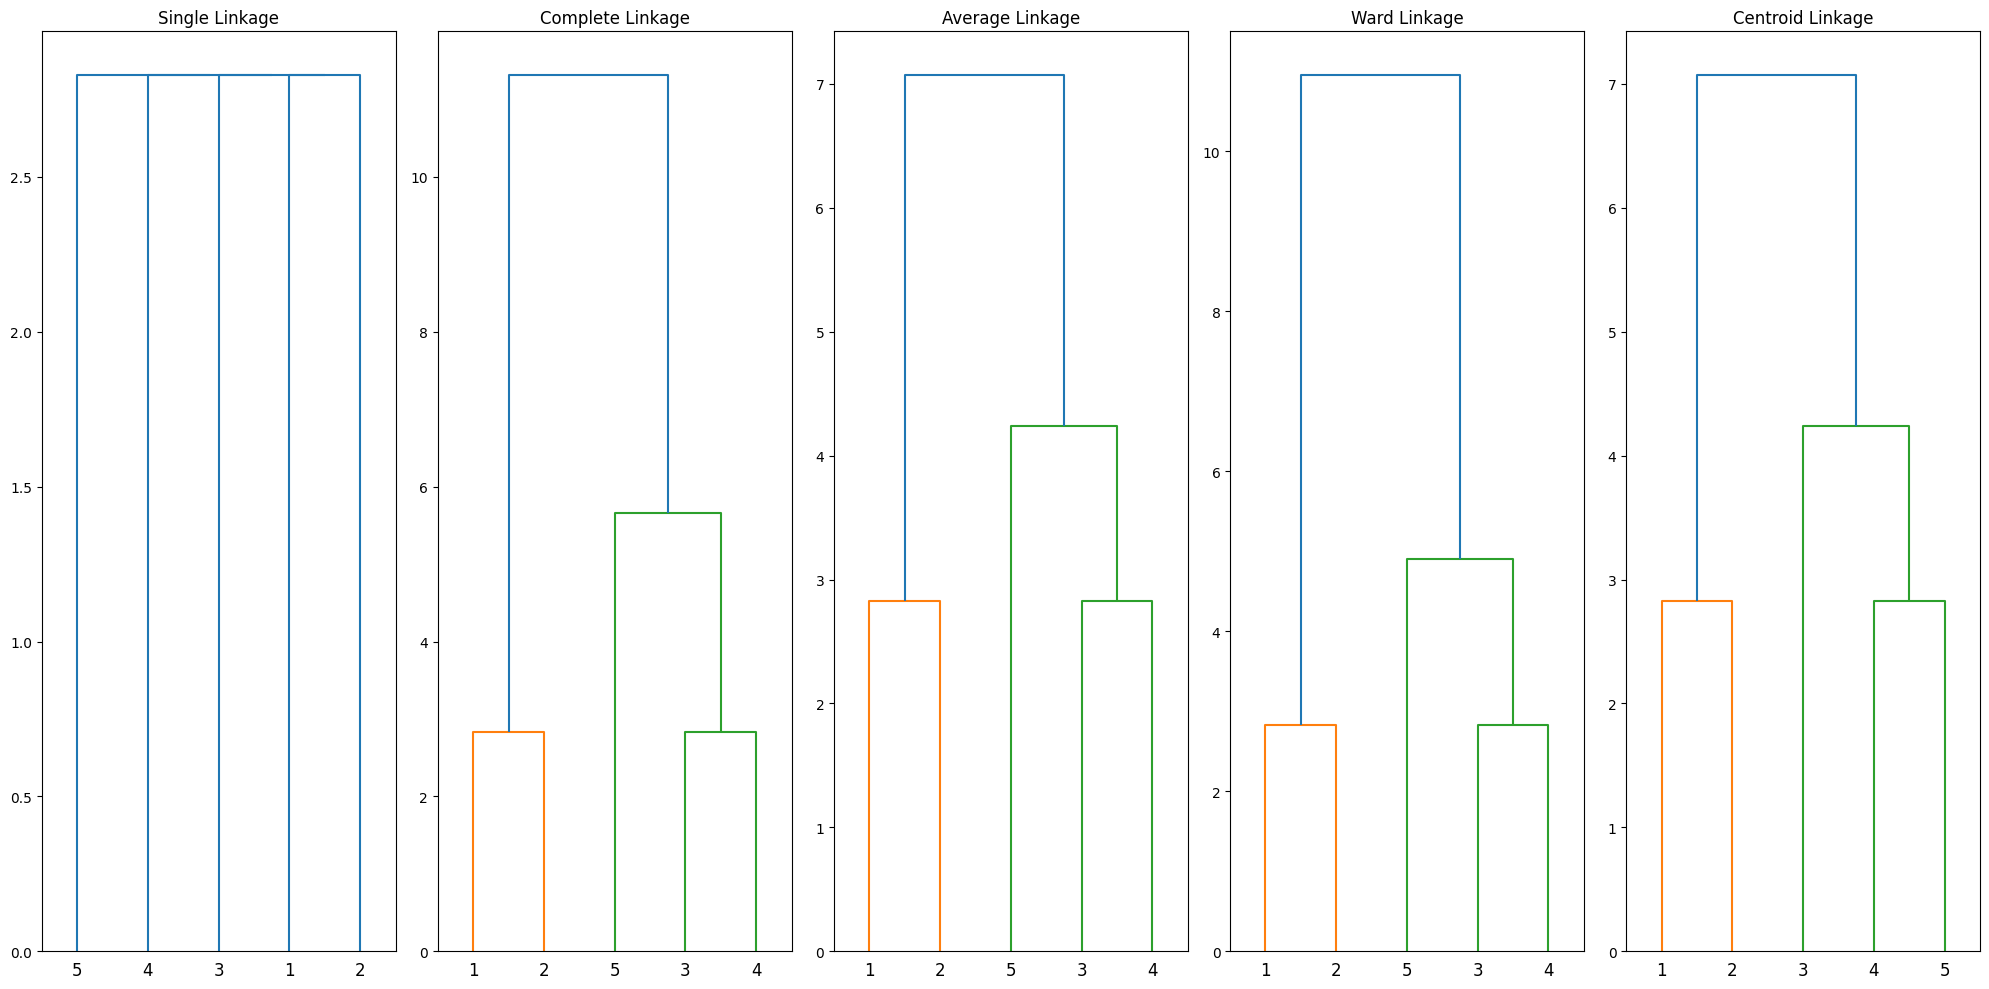

In [5]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample 2D data points
data = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])

# Compute linkage matrices for different methods
Z_single = linkage(data, method='single')    # Minimum distance
Z_complete = linkage(data, method='complete') # Maximum distance
Z_average = linkage(data, method='average')   # Average distance
Z_ward = linkage(data, method='ward')         # Minimize variance
Z_centroid = linkage(data, method='centroid') # Distance between centroids

# Plot dendrograms
methods = ['single', 'complete', 'average', 'ward', 'centroid']
Z_matrices = [Z_single, Z_complete, Z_average, Z_ward, Z_centroid]

plt.figure(figsize=(20, 10))
for i, (method, Z) in enumerate(zip(methods, Z_matrices)):
    plt.subplot(1, 5, i+1)
    dendrogram(Z, labels=np.arange(1, len(data)+1))
    plt.title(f'{method.capitalize()} Linkage')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


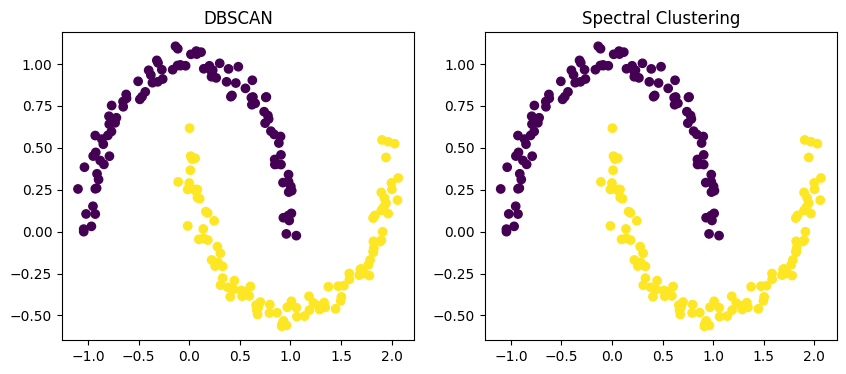

In [6]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# DBSCAN clustering
db_labels = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)

# Spectral Clustering
sp_labels = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42).fit_predict(X)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(X[:,0], X[:,1], c=db_labels, cmap='viridis')
ax1.set_title("DBSCAN")
ax2.scatter(X[:,0], X[:,1], c=sp_labels, cmap='viridis')
ax2.set_title("Spectral Clustering")
plt.show()


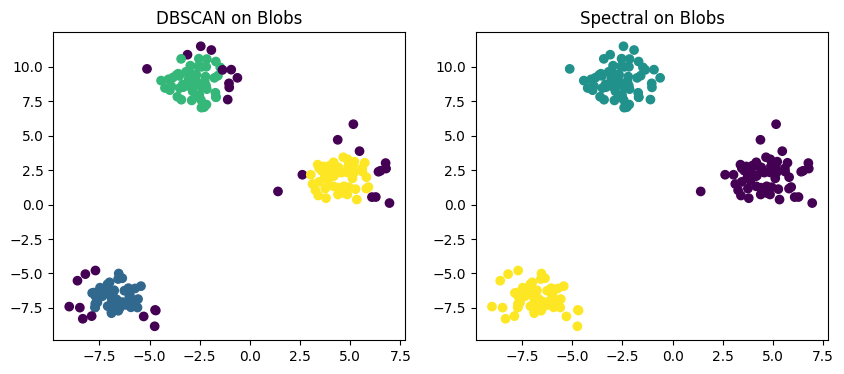

In [7]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate blobs dataset
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# DBSCAN clustering
db_labels = DBSCAN(eps=0.8, min_samples=10).fit_predict(X)

# Spectral Clustering
sp_labels = SpectralClustering(n_clusters=3, random_state=42).fit_predict(X)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(X[:,0], X[:,1], c=db_labels, cmap='viridis')
ax1.set_title("DBSCAN on Blobs")
ax2.scatter(X[:,0], X[:,1], c=sp_labels, cmap='viridis')
ax2.set_title("Spectral on Blobs")
plt.show()


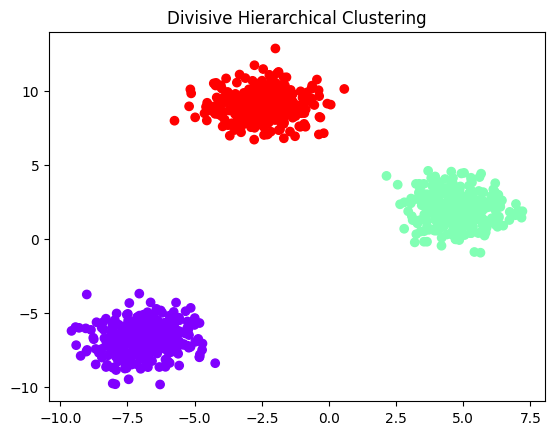

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

def divisive_clustering(X, n_clusters=3):
    clusters = [X]
    labels = np.zeros(len(X), dtype=int)

    while len(clusters) < n_clusters:
        largest_idx = np.argmax([len(c) for c in clusters])
        cluster_to_split = clusters.pop(largest_idx)
        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        split_labels = kmeans.labels_
        clusters.append(cluster_to_split[split_labels==0])
        clusters.append(cluster_to_split[split_labels==1])

    for i, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where((X == point).all(axis=1))[0][0]
            labels[idx] = i
    return labels

labels = divisive_clustering(X, n_clusters=3)

# Plot
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title("Divisive Hierarchical Clustering")
plt.show()


In [9]:
import numpy as np
from sklearn.metrics import jaccard_score

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

def manhattan_distance(p1, p2):
    return np.sum(np.abs(np.array(p1) - np.array(p2)))

def cosine_similarity(p1, p2):
    return np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))

def minkowski_distance(p1, p2, p=3):
    return np.sum(np.abs(np.array(p1) - np.array(p2))**p)**(1/p)

def compute_distance_matrix(points, func, **kwargs):
    n = len(points)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i,j] = func(points[i], points[j], **kwargs)
    return matrix

def main():
    points_2d = np.array([[2,3],[5,7],[1,8],[6,2]])
    points_binary = np.array([[1,0,1,1],[1,1,0,1],[0,1,1,0],[1,1,1,0]])

    print("Euclidean Distance Matrix:\n", compute_distance_matrix(points_2d, euclidean_distance))
    print("Manhattan Distance Matrix:\n", compute_distance_matrix(points_2d, manhattan_distance))
    print("Cosine Similarity Matrix:\n", compute_distance_matrix(points_2d, cosine_similarity))
    print("Minkowski Distance Matrix (p=3):\n", compute_distance_matrix(points_2d, minkowski_distance, p=3))

    n = len(points_binary)
    jaccard_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            jaccard_matrix[i,j] = jaccard_score(points_binary[i], points_binary[j])
    print("Jaccard Similarity Matrix:\n", jaccard_matrix)

if __name__ == "__main__":
    main()


Euclidean Distance Matrix:
 [[0.         5.         5.09901951 4.12310563]
 [5.         0.         4.12310563 5.09901951]
 [5.09901951 4.12310563 0.         7.81024968]
 [4.12310563 5.09901951 7.81024968 0.        ]]
Manhattan Distance Matrix:
 [[ 0.  7.  6.  5.]
 [ 7.  0.  5.  6.]
 [ 6.  5.  0. 11.]
 [ 5.  6. 11.  0.]]
Cosine Similarity Matrix:
 [[1.         0.99948011 0.89442719 0.78935222]
 [0.99948011 1.         0.87954345 0.80873608]
 [0.89442719 0.87954345 1.         0.4314555 ]
 [0.78935222 0.80873608 0.4314555  1.        ]]
Minkowski Distance Matrix (p=3):
 [[0.         4.49794145 5.01329793 4.02072576]
 [4.49794145 0.         4.02072576 5.01329793]
 [5.01329793 4.02072576 0.         6.98636803]
 [4.02072576 5.01329793 6.98636803 0.        ]]
Jaccard Similarity Matrix:
 [[1.         0.5        0.25       0.5       ]
 [0.5        1.         0.25       0.5       ]
 [0.25       0.25       1.         0.66666667]
 [0.5        0.5        0.66666667 1.        ]]
